In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from multiprocess import Process, Pool

In [2]:
rawData = pd.DataFrame(pd.read_csv('Synthetic_Fraud_Data.csv'))
rawData.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
rawData['type'] = rawData['type'].astype('category')
rawData['isFraud'] = rawData['isFraud'].astype('bool')
rawData['isFlaggedFraud'] = rawData['isFlaggedFraud'].astype('bool')
rawData.dtypes

step                 int64
type              category
amount             float64
nameOrig            object
oldbalanceOrg      float64
newbalanceOrig     float64
nameDest            object
oldbalanceDest     float64
newbalanceDest     float64
isFraud               bool
isFlaggedFraud        bool
dtype: object

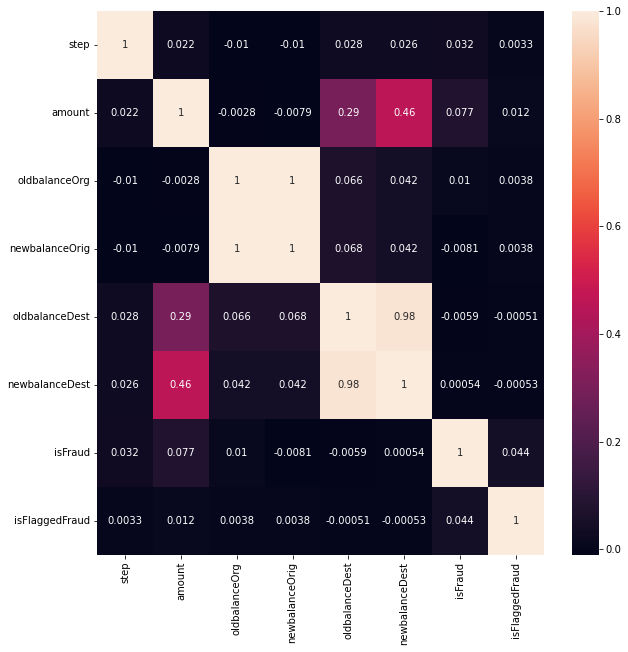

In [4]:
plt.figure(figsize=(10,10))
_ = sns.heatmap(rawData.corr(), annot=True)

We need to create our own variables, there aren't enough here

In [29]:
originNames = rawData['nameOrig'].value_counts()
originNamesNonUnique = np.array(originNames[originNames > 1].index)
originNamesUnique = np.array(originNames[originNames == 1].index)
destNames = rawData['nameDest'].value_counts()
destNamesNonUnique = np.array(destNames[destNames > 1].index)
destNamesUnique = np.array(destNames[destNames == 1].index)

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

array(['C1000194623', 'C1000836905', 'C1002007146', ..., 'C991247178',
       'C99793542', 'C999233538'], dtype=object)

In [ ]:
rawData['origAvgAmount'] = np.NaN
rawData['destAvgAmount'] = np.NaN

def setAmounts(names, data, nameCol, avgCol):
    for name in names:
        data.loc[data[nameCol] == name, avgCol] = data['amount']
def findMeans(names, data, nameCol, avgCol):
    for name in names:
        data.loc[data[nameCol] == name, avgCol] = data.loc[data[nameCol] == name, 'amount'].mean()

origMeanP = Process(target=findMeans, args=(originNamesNonUnique, rawData, 'nameOrig', 'origAvgAmount',))
destMeanP = Process(target=findMeans, args=(destNamesNonUnique, rawData, 'nameDest', 'destAvgAmount',))
origAmntP = Process(target=setAmounts, args=(originNamesUnique, rawData, 'nameOrig', 'origAvgAmount',))
destAmntP = Process(target=setAmounts, args=(destNamesUnique, rawData, 'nameOrig', 'origAvgAmount',))
origMeanP.start()
destMeanP.start()
origAmntP.start()
destAmntP.start()
origMeanP.join()
origDestP.join()
origAmntP.join()
destAmntP.join()

print('Processing complete')

In [13]:
tester = np.linspace(1,50,50)
def test(data):
    return data*-1
def findMeans(data):
    #data.groupby(['nameOrig', 'nameDest'])['amount'] = data.groupby(['nameOrig', 'nameDest'])['amount'].mean()
    return data

testdata = rawData.head(100)
testdata

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,False,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,True,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,True,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,False,False
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,False,False
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,False,False
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,False,False


In [12]:
testdata.groupby(['nameOrig', 'nameDest'])['amount'] = testdata.groupby(['nameOrig', 'nameDest'])['amount'].mean()

TypeError: 'DataFrameGroupBy' object does not support item assignment

In [8]:
testdata[testdata['nameOrig'] == 'C905080434']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,False,False


In [ ]:
def findMeans():
    
def findMeans(namesUnique, namesNonUnique, data, nameCol, avgCol):
    for name in namesUnique:
        data.loc[data[nameCol] == name, avgCol] = data['amount']
    for name in namesNonUnique:
        data.loc[data[nameCol] == name, avgCol] = data.loc[data[nameCol] == name, 'amount'].mean()
def findMeansOrig():
    for name in originNamesUnique:
        rawData.loc[rawData['nameOrig'] == name, 'origAvgAmount'] = rawData['amount']
    for name in originNamesNonUnique:
        rawData.loc[rawData['nameOrig'] == name, 'origAvgAmount'] = rawData.loc[rawData['nameOrig'] == name, 'amount'].mean()
def findMeansDest():
    for name in destNamesUnique:
        rawData.loc[rawData['nameDest'] == name, 'destAvgAmount'] = rawData['amount']
    for name in destNamesNonUnique:
        rawData.loc[rawData['nameDest'] == name, 'destAvgAmount'] = rawData.loc[rawData['nameDest'] == name, 'amount'].mean()